# Анализ рынка недвижимости Санкт-Петербурга
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.  Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования** - проанализировать параметры, определяющие рыночную стоимость объектов недвижимости Санкт-Петербурга и соседних окрестностей для построения автоматизированной системы расчета рыночной стоимости недвижимости.

**Ход исследования:**

Данные для исследования мы получили из файла real_estate_data. О качестве данных ничего не известно. Таким образом, исследование пройдёт в три этапа:

1. Обзор данных.

2. Предобработка данных.

3. Исследовательский анализ данных.

**Задачи исследования:**

1. Изучить общую информацию о данных, выполнить их предобработку.
2. Проверить данные пропуски, на ошибки и оценить их влияние на исследование.
3. Провести исследовательский анализ данных.
4. Изучить различные параметры объектов недвижимости, найти интересные взаимосвязи между ними, которые могут отражаться на формировании рыночной стоимости объекта недвижимости.
5. Исследовать данные с помощью построения различных графиков.
6. Выявить факторы, которые могут влиять на ценообразование на рынке недвижимости.

### Общая информация.  

Импортируем библиотеку pandas, seaborn и matplotlib.  Считаем данные из csv-файла в датафрейм и сохраним в переменную data. 

In [1]:
import pandas as pd  # импортируем библиотеку pandas
import seaborn as sns  # импортируем библиотеку seaborn
import matplotlib.pyplot as plt  # импортируем библиотеку matplotlib
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  # в переменную data сохраним данные из csv-файла, указав в качестве разделителя знак табуляции \t


Выведем первые 10 строк таблицы. 

In [2]:
pd.set_option('display.max_columns', None)  # для отображения всех столбцов 
data.head(10)  # методом head() посмотрим первые 10 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о таблице c помощью метода info().

In [3]:
data.info()  # применим метод info к датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца, 23699 строки. В столбцах разные типы данных: int64, float64, object, bool. В некоторых столбцах есть пропущенные значения.

Согласно документации к данным:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

**Вывод:**

Предварительно можно утверждать, что данных достаточно для анализа. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем. На первый взгляд не видно каких-то аномальных значений в колонках, например отрицательных чисел.
Чтобы двигаться дальше, нужно устранить проблемы в данных.

### Предобработка данных

**Стиль заголовков**

Выведем на экран названия столбцов:

In [4]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Изменим некоторые названия колонок на «змеиный_регистр».

In [5]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'})   # переименование столбцов
data.columns  # проверка результатов - перечень названий столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Пропуски значений**

Посмотрим долю пропусков в датафрейме по каждому параметру:

In [6]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


Посчитаем, сколько в таблице пропущенных значений с помощью методов isna() и sum().

In [7]:
data.isna().sum()  # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видно, что столбцы `total_images`, `last_price`, `total_area`, `first_day_exposition`, `rooms`, `floor`, `studio`, `open_plan` не имеют пропусков.
Самое большое количество пропусков в колонке `is_apartment` (88.3%), скорее всего продавцы не указывают этот параметр, если квартира не апартаменты. Много пропусков в `parks_nearest` (65.9%) и `ponds_nearest` (61.6%). Заполнение этих параметров автоматизировано, возможно данные не отобразились при выгрузке, либо параметр подключен не так давно и многие старые объявления еще не имели его в описании. Также мого пропусков в столбце с количеством балконов (48.6%) и в высоте потолка (38.8%). Примерно по 23 % пропусков в `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `ponds_around_3000`. Есть также пропущенные значения в `days_exposition` (13.4%), `kitchen_area` (9.6%), `living_area` (8.0%), `floors_total` (0.4%) и в `locality_name` (0.2%). 

Анализируя доли пропусков и абсолютные значения количества пропусков примем решение о удалении, замене или игнорировании пропусков.



В столбце locality_name - название населенного пункта пропущено 49 значений. Причины пропусков не ясны, поэтому принято решение удалить эти строки. Эту строку необходимо сделать обязательной при подаче объявления.

В столбце floors_total - число этажей в доме пропущено 86 значений. Значения этой колонки нужны для анализа, причина пропусков не ясна, доля пропусков мала, принято решение удалить данные.

В столбце living_area - жилая площадь было принято решение заполнить пропуски медиаными значениями относительно rooms - количество комнат (категориальная переменная).

В столбце kitchen_area - площадь кухни пропуски мы заполнили пропуски медиаными значениями всего столбца.

В колонке balcony продавцы часто не указывают число балконов, скорее всего их в квартире просто нет. Поэтому заменим пропуски на 0. 

В колонке is_apartment хранится булев тип данных. True - апартаменты, False - не апартаменты. Пропуски можно заменить на False. Скорее всего квартира, гле появился пропуск не является апартаментами, поэтому не указали значение. 

В столбце city_centers_nearest - расстояние до центра города 5519 пропусков, заменим на -999, скорее всего до центра города далеко, поэтому пропуск. Но нам нужно будет переводить значения в км, поэтому пропуск заменим на дефолтное число. 

В столбце ceiling_height - высота потолков 9195 пропусков, заполним медианными значениями по всему столбцу, медиана менее чувствительна к выбросам. А в колонке есть выбросы, продавец мог ошибится при ручном вводе данных. 

В столбце days_exposition - сколько дней было размещено объявление 3181 пропуск. Возможно объявление не прошло модерацию и не было опубликовано, либо данные исказились при выгрузке, поэтому пока оставим пропуски.

В столбце airports_nearest - расстояние до ближайшего аэропорта, заменим пропуски на -999.  Пропусков много, незаполненный параметр говорит о том, что аэропорт либо очень далеко, либо этот параметр в объявлениях появился недавно, либо данные исказились при выгрузке.

В столбцах airports_nearest - расстояние до ближайшего аэропорта, parks_around_3000 - число парков в радиусе 3 км,  parks_nearest - расстояние до ближайшего парка, ponds_around_3000 - число водоемов в радиусе 3 км, ponds_nearest - расстояние до ближайшего водоема заменим пропуски на 0. 

In [8]:
data.dropna(subset=['locality_name'], inplace=True)  # удаление строк с пропуском в столбце locality_name
data.dropna(subset=['floors_total'], inplace=True)  # удаление строк с пропуском в столбце floors_total
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)  # замена пропусков в столбце kitchen_area на медианные значения по столбцу. 
data['balcony'] = data['balcony'].fillna(0)  # замена пропусков в столбце balcony на 0.  
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(-999)  # замена пропусков в столбце city_centers_nearest на -999. 
data['airports_nearest'] = data['airports_nearest'].fillna(-999)  # # замена пропусков в столбце airports_nearest на -999. 
data['is_apartment'] = data['is_apartment'].fillna(False)  # замена пропусков в столбце is_apartment на False.    
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)  # замена пропусков в столбце ceiling_height на медианные значения по столбцу.

  # создадим цикл, который переберет в столбце rooms уникальные категории и заполнит пропуски в living_area эими медианными значениями
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()
# заменим пропуски на медианные значения
# data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].describe()[5]
data.info()  # выведем общую информацию о датафрейме после обработки пропусков

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

После обработки пропусков количество строк в датафрейме стало 23565. Пропуски из колонок, которые не влияют на наше исследование мы оставили.  Некоторые строки пришлось удалить из-за наличия в них пропусков, так как без значения в этих ячейках невозможно исследовать данные. Такие данные как площадь кухни, жилая площадь, высота потолков заполнили медианными значениями. Выбрали медиану, так как она менее чувствительна к выбросам, чем среднее. 

**Дубликаты**

Посчитаем явные дубликаты:

In [9]:
data.duplicated().sum() 

0

Явных дупликатов в таблице нет, можно двигаться дальше.

Проверим наличие неявных дубликатов в колонке locality_name. Например, название одного и того же населенного пункта может быть записано немного по-разному. 
Для этого выведем на экран список уникальных названий населенных пунктов, отсортированный в алфавитном порядке. 

In [10]:
display(data['locality_name'].sort_values().unique())  # просмотр уникальных названий населенных пунктов
print('Количество населенных пунктов:', len(data['locality_name'].unique()))

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Количество населенных пунктов: 364


Используя функцию replace() заменим некоторые частей строк в названии населеных пунктов для удобства просмотра информации.


In [11]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')  # замена всех букв ё на е 
data['locality_name'] = data['locality_name'].replace(['коттеджный ', 'садоводческое некоммерческое ',\
                                                       'городской ', 'товарищество ', 'станции ','имени ',\
                                                       'садовое товарищество ', 'село ', 'деревня ', 'садовое ',\
                                                       'городской поселок ', 'железнодорожной ', 'при', 'поселок ',\
                                                       'городского типа '], '', regex=True)
display(data['locality_name'].sort_values().unique())
#data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')  # приведение поселков городского типа к одинаковой записи  
print('Количество населенных пунктов после обработки:', len(data['locality_name'].unique()))

array([' Вещево', ' Приветнинское', 'Агалатово', 'Александровская',
       'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы',
       'Белогорка', 'Белоостров', 'Бокситогорск', 'Большая Вруда',
       'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны',
       'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива',
       'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги',
       'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение',
       'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов',
       'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой',
       'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое',
       'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки',
       'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка',
       'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский',
       'Жилгородок', 'Жилпоселок', 'Житково', 'Заводской', 'Заклинье',
       'Заневка', 'Запорожское', 'Зеленогорск', 'Зим

Количество населенных пунктов после обработки: 307


Неявные дубликаты убраны. Возможно стоит настроить выгрузку населенных пунктов при подаче объявления из выпадающего списка, чтобы избегать дубликатов. 

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий</b> 
    
👍 
Можно еще вот так:
    
    df = df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

    len(df.locality_name.unique())
</div>

**Изменение типа данных**

Заменим строчный тип данных в столбце first_day_exposition на тип данных datetime64 с помощью метода pd.to_datetime. Так мы сможем использовать функции pandas, предназначенные для работы с датой и временем (например, извлечь год, день недели и т.д.).

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')  # замена строчного типа данных на datetime

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий </b> 
    
👍 При чтении файла можно указать параметр `parse_dates: parse_dates=['first_day_exposition']`. Тогда пандас автоматически переведет список столбцов в даты. 
</div>

Данные, хранящиеся в датафрейме должны отражать природу чисел, поэтому приведем число этажей в доме и количество балконов к целочисленному типу данных.

In [13]:
data['floors_total'] = data['floors_total'].astype('int')  # заменим тип данных в floors_total на целочисленный тип
data['balcony'] = data['balcony'].astype('int')  # заменим тип данных в balcony на целочисленный тип
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Посмотрим, за какой срок собраны данные. 

In [14]:
display(min(data['first_day_exposition']), max(data['first_day_exposition']))

Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

В таблице объявления с датой публикации с ноября 2014 по май 2019 гг.

**Построим общую гистограмму для всех числовых столбцов таблицы.**

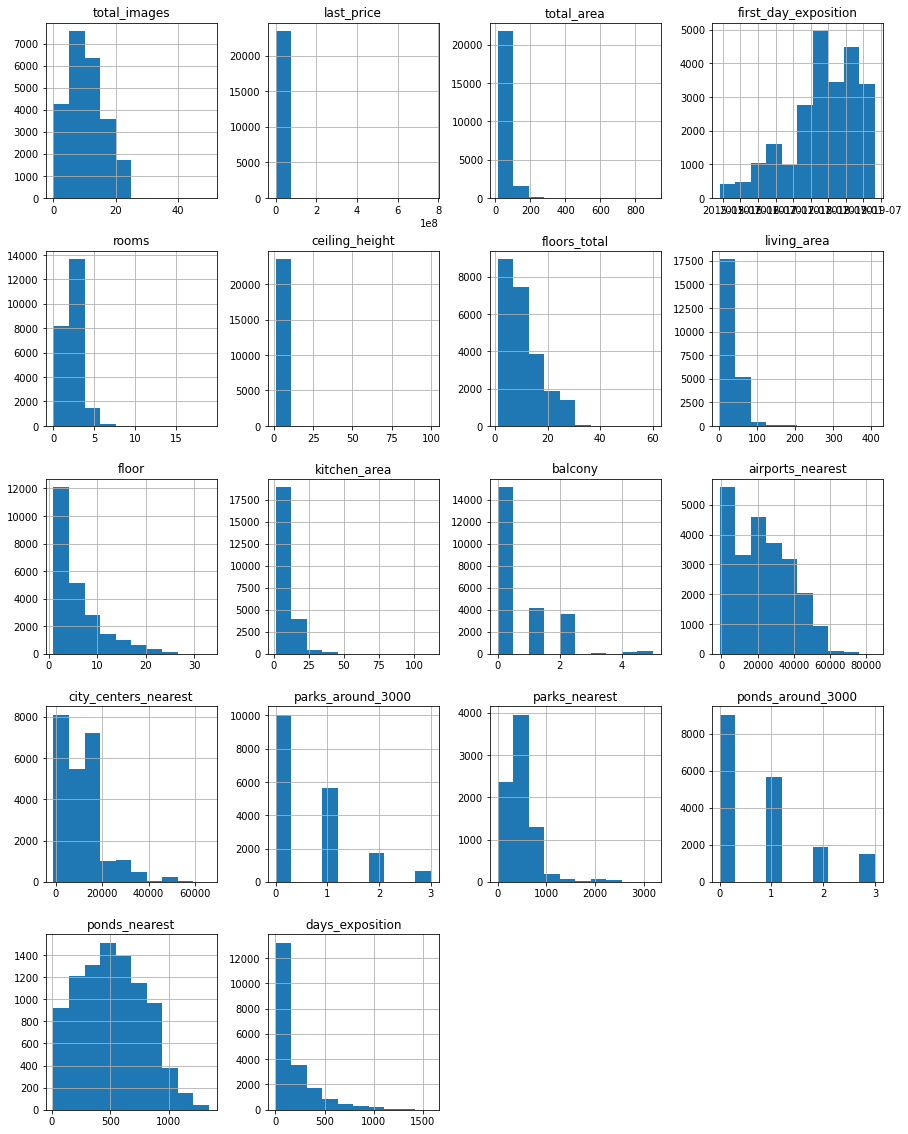

In [15]:
data.hist(figsize=(15, 20))  # построим гистограммы для датафрейма
plt.show()  # используем plt.show() для красивого отображения графиков  

На подготовительном этапе графики нужны для оценки качества данных. Гистограммы для датафрема позволяют визуально оценить данные. Основываясь на визуальном представлении данных в виде гистограмм мы можем сказать, что показатели лежат в пределах каких-то адекватных значений. Не очень удачно отобразились столбцы `last_price`, `ceiling_height`, `first_day_exposition`, однако
даже по таким небольшим гистограммам мы можем оценить распределение количественных признаков.  Видно, что большая часть квартир имеют общую площадь примерно до 100 кв.м. С нулевой общей площадью квартир нет, это хорошо. Большинство квартир имеют до 4 комнат. Много квартир без комнат, возможно это студии или квартиры со свободной планировкой.  Много квартир в домах с количеством этажей до 20, это тоже похоже на правду. Много квартир с жилой площпдью 40-50 кв.м., есть до 100 кв.м. Преимущественно площадь кухни до 10-15 кв.м., есть кухни просторнее, но их уже меньше. В основном квартиры без балконов или с 1, 2. Но мы помним, что в этом столбце было много пропусков и их заполнили 0. Расстояние до аэропорта в основном  от 20 до 50-60 км. Отдаленность от центра у многих квартир  менее 20 км, возможно большинство объявлений из Санкт-Петербурга и ближайших окрестностей. Многие объекты недвижимости находятся рядом с парками и прудами, которые есть в радиусе 1 км. большая часть квартир была продана/снята с продажи менее черем 250 дней со дня публикации.
Таким образом, общее описание датафрейма по графикам позволяем говорить о том, что данные адекватны, данных достаточно для обработки и анализа.

**Выведем основную статистическую информацию о датафрейме с помощью метода describe().**

Метод отражает основные статистические характеристики для каждого столбца. Нам полезно посмотреть разброс значений по каждому столбику, чтобы оценить наличие аномальных значений. При вызове метода в колонке last_price появляются экспоненциальная записи, не очень удобные для чтения. Поэтому с помощью pandas.options изменим их отражение.

In [16]:
pd.options.display.float_format = '{:,.2f}'.format
data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,"23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","18,065.00","8,030.00","18,065.00","9,036.00","20,394.00"
mean,9.88,"6,540,058.26",60.32,2.07,2.72,10.68,34.32,5.88,10.42,0.59,"21,812.42","10,646.32",0.61,490.58,0.77,518.29,180.74
std,5.68,"10,910,934.72",35.66,1.08,0.99,6.59,21.72,4.87,5.63,0.96,"16,778.18","9,908.09",0.80,341.57,0.94,278.01,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,-999.00,-999.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.60,5.00,18.40,2.00,7.30,0.00,"10,143.00","2,186.00",0.00,288.00,0.00,293.00,45.00
50%,9.00,"4,646,000.00",52.00,2.00,2.65,9.00,30.30,4.00,9.10,0.00,"21,854.00","11,246.00",0.00,455.00,1.00,503.00,95.00
75%,14.00,"6,790,000.00",69.70,3.00,2.70,16.00,42.70,8.00,11.41,1.00,"34,324.00","15,237.00",1.00,612.00,1.00,730.00,231.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


По таблице видно, что в датафрейме есть сильно выбивающиеся и редкие значения, которые смещают среднее относительно медианы. Например,  максимальная общая площадь 900 кв.м, при медиане 52 кв.м.. Жилая площадь с минимальным значением - 2 м., а максимальная 409.7 кв.м. с медианой 30.30 по датафрейму. Видимо есть какая-то редкая огромная квартира или несколько квартир. Площади кухонь начинаются от 1.3 м, конечно это аномалия, возможно вследстви ошибки ввода данных.  В наших данных есть квартиры с 19 комнатами. Высота потолков доходит до 100 м, такое значение точно невозможно и нужно работать с таким выбросом, а есть потолки 1 м. Этажность домов доходит до 60 этажей. Таких домов в Санкт-Петербурге нет.  С парками и прудами все неплохо, часто в радиусе полукиломера есть водоем и парк. Оставим тут все как есть. В столбике длительности размещения объявлений есть значение 1580 дней. Колонку отдаленность от центра проанализируем позже, так как пропуски там заменены на -999. Сейчас расчеты тут недостоверны. 
Стандартное отклонение по last_price очень большое, значит в данных есть аномалии или выбросы.

При первом знакомстве с описательными статистическими данными становится понятно, что датафрейм нужно фильтровать для того, чтобы при анализе и обработке наши выводы не исказились и были верны.

**Найдем редкие и выбивающиеся значения в количественных переменных.**

Для каждого признака можно построить диаграмму размаха, но пока воспользуемся функцией, которая вернет нам значение границы "усов"  в boxplot для каждого исследуемого признака.  "Ящик с усами" ограничен первым (Q1) и третьим (Q3) квартилями, а "усы" простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха (IQR). Зная, что в размах "усов" попадают нормальные значения, а за пределами находятся выбросы. 
  Для этого используем собственную функцию, которая будем возвращать границы "усов".

In [17]:
def abnormal_values(column):  #  назовем функцию abnormal values, она поможет определить выбросы, на вход дадим столбец
    stat = data[column].describe()
    iqr = stat[6] - stat[4]  # значение межквартильного размаха: Q3-Q1
    q1_whisker = stat[4] - iqr*1.5 
    q3_whisker = stat[6] + 1.5 * iqr
    if q1_whisker < 0:
        q1_whisker == 0
        

    return [q1_whisker, q3_whisker]  # функция возвращает границы правого и левого уса, за пределами которых находятся редкие или аномальные значения



Посмотрим на столбец **`last_price`**:

count        23,565.00
mean      6,540,058.26
std      10,910,934.72
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

[-1685000.0, 11875000.0]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


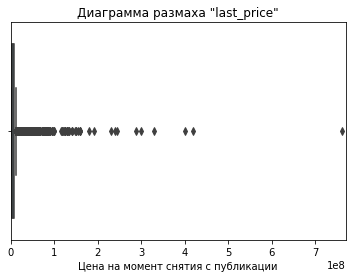

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


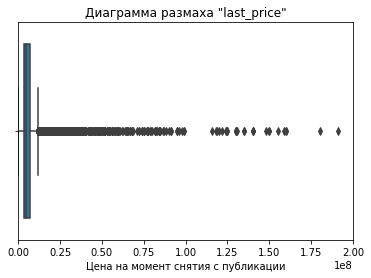

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

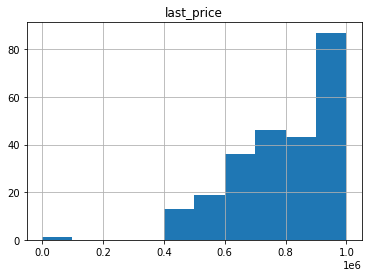

In [18]:
display(data['last_price'].describe())
display(abnormal_values('last_price'))
sns.boxplot(data['last_price'])  # построим boxplot для визуализации данных с диапозоном
plt.title('Диаграмма размаха "last_price"')
plt.xlabel('Цена на момент снятия с публикации')
_ = plt.xlim(0, 770000000)
plt.show()
sns.boxplot(data['last_price'])  # построим boxplot для визуализации данных
plt.title('Диаграмма размаха "last_price"')
plt.xlabel('Цена на момент снятия с публикации')
_ = plt.xlim(0, 200000000)
plt.show()
data.hist(column='last_price', range=(0,1000000), bins=10) # посмотрим по гистограмме что с распределением квартир со стоимостью меньше 1 млн.


По цене точно есть выбросы, это было видно и по стандартной ошибке, отфильтруем датафрейм со стоимостью до 100,000,000.00, потому что несколько квартир имеют очень высокую цену. А также есть квартира по цене  12,190.00, по гистограмме видно, что надо отфильтровать квартиры дешевле 100 тыс.

In [19]:
#display(len(data[(data['last_price'] > 100000000)]))  # посчитаем сколько квартир со стоимостью более ста миллионов
data = data[(data['last_price'] > 100000) & (data['last_price'] < 100000000)]  # сохраним в датафрейме квартиры стоимостью менее 763 миллионов


Посмотрим на столбец **`total_area`**:

count   23,527.00
mean        59.90
std         33.46
min         12.00
25%         40.00
50%         52.00
75%         69.50
max        590.00
Name: total_area, dtype: float64

[-4.25, 113.75]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


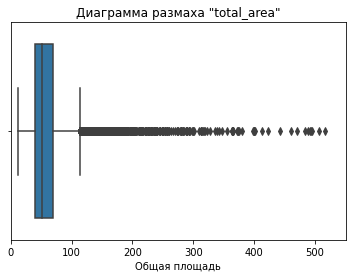

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

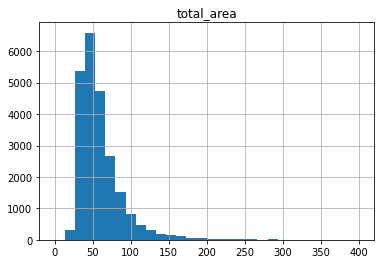

In [20]:
display(data['total_area'].describe())  # оценим основные статистические показатели по столбцу total_images
display(abnormal_values('total_area'))  #  посмотрим значение рапзмаха усов по столбцу

sns.boxplot(data['total_area'])  # построим boxplot для визуализации данных
plt.title('Диаграмма размаха "total_area"')
plt.xlabel('Общая площадь')
_ = plt.xlim(0, 550)
plt.show()
data.hist(column='total_area', range=(0,400), bins=30)

Анализируя столбец `total_area` мы видим, что больше всего квартир с площадью 40-70 кв.м. По гистограмме и boxplot по столбцу общей площади видно, что значений с площадью более 300 кв.м. уже мало, гистограмма с длинным хвостом на высоких значениях площади уходит вправо. Решено отфильтровать датафрейм от квартир с общей площадью > 300 кв.м. с помощью метода query.

In [21]:
data = data.query('total_area < 300')  # срез данных методом query, убрали квартиры с общей площадью более 300 кв.м. 


Посмотрим столбец `living_area`:

count   23,480.00
mean        33.80
std         19.32
min          2.00
25%         18.40
50%         30.20
75%         42.50
max        250.00
Name: living_area, dtype: float64

[-17.750000000000007, 78.65]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


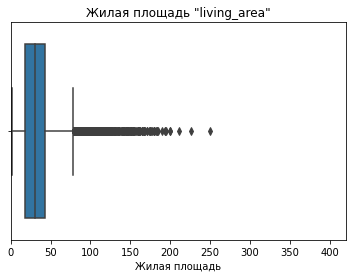

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

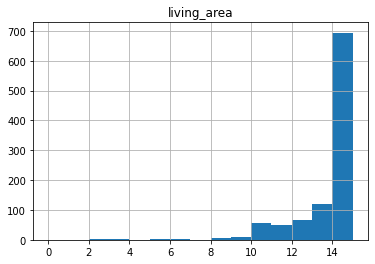

In [22]:
display(data['living_area'].describe())
display(abnormal_values('living_area'))
sns.boxplot(data['living_area'])  # построим boxplot для визуализации данных
plt.title('Жилая площадь "living_area"')
plt.xlabel('Жилая площадь')
_ = plt.xlim(0, 420)
plt.show()
data.hist(column='living_area', range=(0,15), bins=15)


Анализируя столбец living_area мы видим, что больше всего квартир с  жилой площадью 20-42 кв.м. По boxplot виден длинный хвост из квартир площадью более 78 кв.м.(граница правого "уса"). Оставим квартиры с площадью хотя бы от 6 кв.м., а также  очистим датафрейм от квартиры с жилой площадью более 250 кв.м.

In [23]:
data = data.query('living_area > 6 & living_area < 250 ')  # срез данных методом query, убрали квартиры с жилой площадью более 300 кв.м.
data.shape[0]  # оценим, сколько квартир осталось

23472

Посмотрим столбец **`kitchen_area`**:

count   23,472.00
mean        10.34
std          5.35
min          1.30
25%          7.30
50%          9.10
75%         11.40
max        107.00
Name: kitchen_area, dtype: float64

[1.1499999999999995, 17.55]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


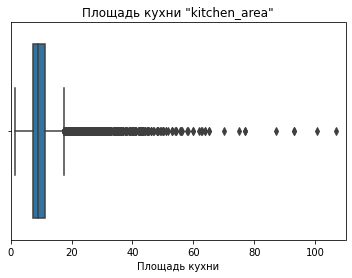

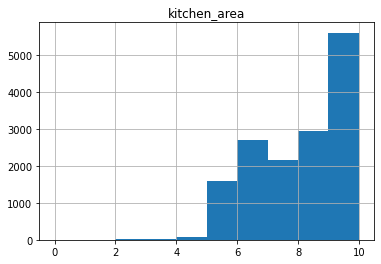

In [24]:
display(data['kitchen_area'].describe())
display(abnormal_values('kitchen_area'))
sns.boxplot(data['kitchen_area'])  # построим boxplot для визуализации данных
plt.title('Площадь кухни "kitchen_area"')
plt.xlabel('Площадь кухни')
_ = plt.xlim(0, 110)
plt.show()
data.hist(column='kitchen_area', range=(0,10), bins=10)
plt.show()

Обычно площади кухонь находятся в диапозоне до 7.30 - 11.4 м. Однако у нас есть нереально маленькие площади, очистим датафрейм от кухонь меньше 4 м. Посмотрим, может быть это в студиях или квартирах со cвободной планировкой. Кухня там не выделана как таковая, продавец мог указать какую-то маленькую величину.

In [25]:
data2 = len(data.query('(studio == True | open_plan == True) & kitchen_area < 4'))  # считаем количество квартир студий или квартир со своб. планировкой и площадью кухни менее 4 кв.м.
data2

0

Таких квартир нет, поэтому очистим датафрейм от кухонь менее 4 кв.м., в обычной квартире с комнатами такая площадь нереальна.

In [26]:
data = data.query('kitchen_area > 4') 
data.shape

(23419, 22)

Посмотрим столбец **`balcony`**:

array([0, 1, 2, 3, 4, 5])

80

182

301

array([[<AxesSubplot:title={'center':'balcony'}>]], dtype=object)

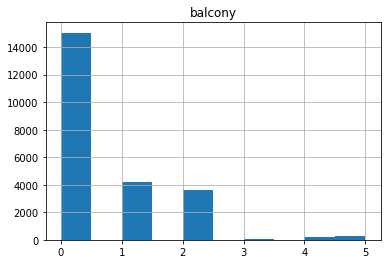

In [27]:
display(data['balcony'].sort_values().unique())
display(len(data.query('balcony == 3')))  # выведем на экран количество квартир с 3 балконами
display(len(data.query('balcony == 4')))  # выведем на экран количество квартир с 4 балконами
display(len(data.query('balcony == 5')))  # выведем на экран количество квартир с 5 балконами
data.hist(column='balcony', range=(0,5), bins=10)

Очень странно, что есть квартиры с более, чем 1-2 балконами. В датафрейме встречаются квартиры с 1,2,3,4,5 балконами. Много без балконов, но мы сами заполнили пропуски в этой колонке на 0. Учитывая, что в Санкт-Петербурге много коммунальных квартир, оставим пока столбец как есть.

Посмотрим столбец **`floor`**:

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

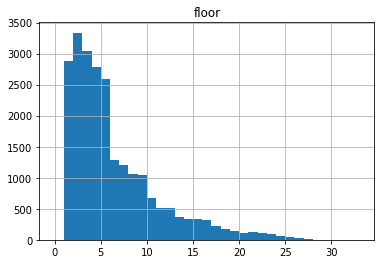

In [28]:
display(data['floor'].sort_values().unique())
data.hist(column='floor', range=(0,33), bins=33)

По гистограмме видно, что нет 0 этажей, много квартир с 1 по 6 этаж, меньше с 7 по 10. Гистограмма имеет ожидаемый тип. Этот столбец оставим без измениний.

Посмотрим столбец **`floors_total`**:

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37,
       52, 60])

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

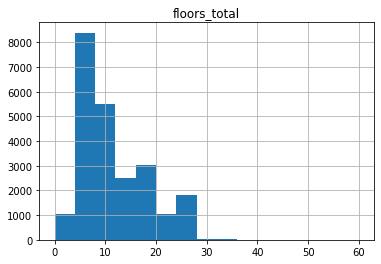

In [29]:
display(data['floors_total'].sort_values().unique())
data.hist(column='floors_total', range=(0,60), bins=15)

In [30]:
display(data.query('floors_total > 35'))  # выведем на экран квартиры выше 35 этажа (в Санкт-Петербурге нет домов выше)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
397,15,"5,990,000.00",54.00,2018-03-22,2,2.65,36,21.40,28,False,False,False,18.70,1,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,11.00
2253,12,"3,800,000.00",45.50,2018-06-28,2,2.88,60,27.40,4,False,False,False,7.40,0,Кронштадт,"67,763.00","49,488.00",2.00,342.00,3.00,614.00,166.00
5807,17,"8,150,000.00",80.00,2019-01-09,2,27.00,36,41.00,13,False,False,False,12.00,5,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,38.00
11079,16,"9,200,000.00",75.00,2019-02-22,2,2.70,36,40.00,29,False,False,False,12.00,2,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,NaN
16731,9,"3,978,000.00",40.00,2018-09-24,1,2.65,52,10.50,18,False,False,False,14.00,0,Санкт-Петербург,"20,728.00","12,978.00",1.00,793.00,0.00,NaN,45.00
16934,5,"4,100,000.00",40.00,2017-10-17,1,1.75,37,17.40,5,False,False,False,8.34,0,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,71.00


Шесть квартир оказались не аномальными по всем показателям, кроме этажности домов. Исправим аномальные значения сами. В Кронштате, скорее всего в доме не 60, а 6 этажей. А в Санкт-Петербурге продавец указал квартиру на 18 этаже, поэтому в доме скорее всего не 52, а 22 этажа, остальные ошибки такие же, скорее всего ошибки ввода. Исправим на более реальные значения вручную.

In [31]:
data.loc[397, "floors_total"] = 35  # заменим значение 397 строки на 35
data.loc[2253, "floors_total"] = 6  # заменим значение 2253 строки на 6
data.loc[5807, "floors_total"] = 16  # заменим значение 5807 строки на 16
data.loc[11079, "floors_total"] = 35  # заменим значение 11079 строки на 35
data.loc[16731, "floors_total"] = 22  # заменим значение 16731 строки на 6
data.loc[16934, "floors_total"] = 7  # заменим значение 16731 строки на 7

Посмотрим столбец **`rooms`**:

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 16])

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

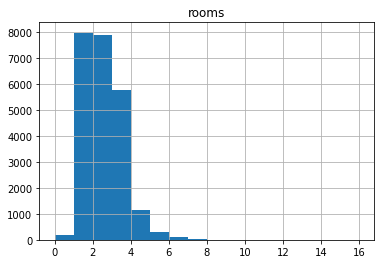

In [32]:
display(data['rooms'].sort_values().unique())
data.hist(column='rooms', range=(0,16), bins=16)

Большая часть квартир имеет 1-2 комнаты, чуть меньше 3-хкомнатных объектов недвижимости. В Санкт-Петербурге много коммунальных квартир с огромным числом комнат,  поэтому оставим столбец как есть.

Посмотрим столбец **`days_exposition`**:

count   20,268.00
mean       180.56
std        219.69
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

[-234.0, 510.0]

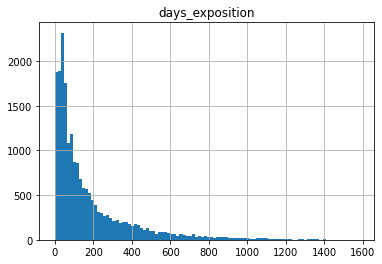

In [33]:
display(data['days_exposition'].describe())
data.hist(column='days_exposition', range=(0,1580), bins=100)
abnormal_values('days_exposition')

Большая часть объявлений публиковались в диапозоне 45-231 день. Выглядит логично. Минимальное количество дней на сайте = 1.  Есть объявление, которое было активным 1580 дней. Гистограмма имеет ожидаемый вид, посмотрим сколько объявлений висело дольше 510 дней.

In [34]:
data.query('days_exposition > 510')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
17,6,"4,180,000.00",36.00,2016-09-09,1,2.65,17,16.50,7,False,False,False,11.00,1,Санкт-Петербург,"33,564.00","14,616.00",0.00,NaN,1.00,859.00,571.00
23,11,"2,950,000.00",32.00,2016-10-29,1,2.60,9,17.70,9,False,False,False,6.10,0,Санкт-Петербург,"15,414.00","14,211.00",2.00,517.00,1.00,190.00,615.00
35,6,"15,500,000.00",149.00,2017-06-26,5,2.65,5,104.00,4,False,False,False,17.00,0,Санкт-Петербург,"23,670.00","3,502.00",0.00,NaN,1.00,779.00,644.00
42,13,"22,000,000.00",161.80,2015-07-08,4,2.80,4,80.90,2,False,False,False,17.60,5,Петергоф,"35,416.00","30,605.00",2.00,47.00,1.00,907.00,987.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,"9,000,000.00",110.00,2015-12-10,4,3.36,7,64.60,5,False,False,False,15.80,0,Санкт-Петербург,"26,313.00","5,016.00",3.00,417.00,1.00,118.00,816.00
23672,5,"3,000,000.00",30.80,2016-06-08,1,2.65,5,16.10,3,False,False,False,6.30,0,Санкт-Петербург,"44,614.00","14,193.00",2.00,258.00,0.00,NaN,808.00
23675,8,"3,550,000.00",39.50,2016-10-03,1,2.65,16,19.00,13,False,False,False,8.50,0,Санкт-Петербург,"25,740.00","14,951.00",0.00,NaN,0.00,NaN,721.00
23691,11,"9,470,000.00",72.90,2016-10-13,2,2.75,25,40.30,7,False,False,False,10.60,1,Санкт-Петербург,"19,424.00","4,489.00",0.00,NaN,1.00,806.00,519.00


В датафрейме 1650 строк со сроком размещения более 510 дней. 

Исходя из того, что нам необходимо определять рыночную стоимость объетов недвижимости на основании их параметров, логично было бы убрать их датафрейма эти строки,  такие квартиры, скорее всего имеют завышенную стоимость. Однако из-за большого количества таких квартир оставим строки в датафрейме.

Может быть квартиры проблемные в плане документов, сложное оформление. Пока оставим как есть.

Проанализируем столбец **`ceiling_height`**:

In [35]:
display(data['ceiling_height'].describe())  # оценим основные статистические показатели по столбцу ceiling_height
display(abnormal_values('ceiling_height'))  #  посмотрим значение рапзмаха усов по столбцу


count   23,419.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

[2.45, 2.8500000000000005]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


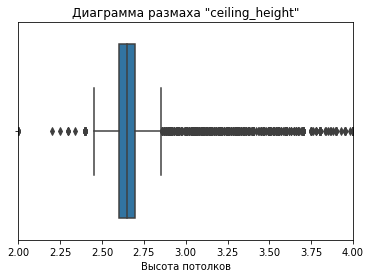

In [36]:
sns.boxplot(data['ceiling_height'])  # построим boxplot для визуализации данных
plt.title('Диаграмма размаха "ceiling_height"')
plt.xlabel('Высота потолков')
_ = plt.xlim(2, 4)
plt.show()

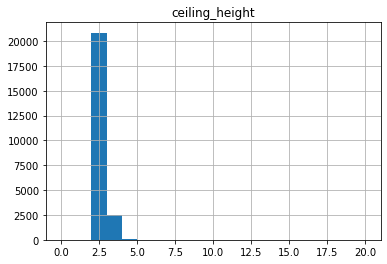

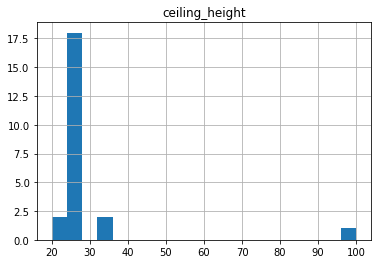

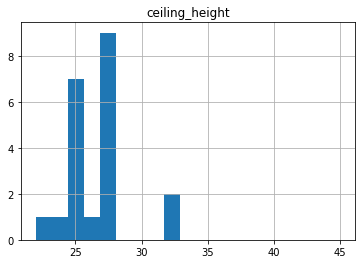

In [37]:
data.hist(column='ceiling_height', range=(0,20), bins=20)
plt.show()
data.hist(column='ceiling_height', range=(20,100), bins=20)
plt.show()
data.hist(column='ceiling_height', range=(22,45), bins=19)
plt.show()

Анализируя данные по столбцу высота потолков мы видим, что разброс значений до 100 м. Основная доля значений лежит в дипозоне границ усов: от 2.45 до 2.85 м. Однако, зная, что в Санкт-Петербурге сохранилось много домов с потолками высотой до 4.2 м, мы сохраним в нашем датафрейме квартиры с потолками от 2.45 до 4.2 м. 
Одно значение равно 100 м. Это выброс, связанный скорее всего с ошибкой в данных. Строку с этим значение удалим. Также удалим строки с потолками меньше 2.45 м. 
Мы вывели отдельно гистограмму для значений высоты потолка от 20 до 100 м. Видно, что большая доля лежит в границах 20 - 28 м, есть значения 32 м.  Скорее всего, это вещественные значения. Их приведем к корректному виду. 

In [38]:
data = data[((data['ceiling_height'] > 2.45) & (data['ceiling_height'] < 4.2) & (data['ceiling_height'] != 100)) | ((data['ceiling_height'] > 24) & (data['ceiling_height'] < 40))]  # удаление строк с аномальными значениями
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x > 24 else x)  # с помощью лямбда-функции поделили на 10 все знгачения, где потолок больше 24 м
data['ceiling_height'].describe()  # изучим основные статистические характеристики столбца после преобразований

count   23,321.00
mean         2.69
std          0.20
min          2.46
25%          2.60
50%          2.65
75%          2.70
max          4.19
Name: ceiling_height, dtype: float64

Отфильтровав таблицу по условию, что диапозон высоты потолков от 2.45 м. до 4.2 м. в нашей таблице осталось 23321 значение.

In [39]:
data.shape

(23321, 22)

**Вывод:** 
На этапе преобработки мы определили и заполнили пропуски в столбцах, где это было возможно и нужно. Пропуски могут быть связаны с человеческим фактором (ошибка ручного ввода), либо техническим (данные исказились при выгрузке).  Избавились от дубликатов. Преобразовали типы данных в столбцах, где значения не соответствовали природе данных, изменили тип данных для работы с датой. Использовали описательные статистические величины для обобщения и описания данных. Использовали гистограммы как средство визуализации распределения величин. Простые приемы визуализации позволили изучить большой объем информации. Мы удалили редкие и аномальные значения из датафрейма. Попытались применить boxplot и посмотреть на данные, которые выходят за пределы 'усов'. Такие значения мы определили как редкие, оставив в датафрейме разумные значения.  Можно говорить о том, что данные пригодны для анализа и их достаточно. 

### Посчитаем и добавим в таблицу новые столбцы

Добавим в таблицу столбец `square` - стоимость одного квадратного метра.

In [40]:
data['square'] = data['last_price'] / data['total_area']  #  стоимость кв.метра определяется соотношением цены к общей площади


Посчитаем и добавим в таблицу столбец `weekday` - день публикации объявления (0 - понедельник, 1 - вторник и т.д.).

In [41]:
data['weekday'] = data['first_day_exposition'].dt.weekday  # добавим новый столбец, содержащий только день 

Посчитаем и добавим в таблицу столбец `month` - месяц публикации объявления.

In [42]:
data['month'] = data['first_day_exposition'].dt.month  # добавим новый столбец, содержащий только месяц 


Посчитаем и добавим в таблицу столбец `year` - год публикации объявления.

In [43]:
data['year'] = data['first_day_exposition'].dt.year  # добавим новый столбец, содержащий только год 


Посчитаем и добавим в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»).
На основании этажа, указанного в объявлении, создадим в датафрейме data столбец `floor_type` с нужными категориями.
Используем собственную функцию с именем categorize_floor() и метод apply().

In [44]:
def categorize_floor(row):  # функция categorize_floor принимает на вход этаж, а возвращает тип этажа
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(categorize_floor, axis=1)
data['type_floor'].unique()  # проверка уникальных значений в столбце type_floor


array(['другой', 'первый', 'последний'], dtype=object)

Посчитаем и добавим в таблицу столбец `city_centers_km` - расстояние в км до центра города. Переведем данные из метров в км и округлим до целых значений. Для этого значения из столбца нужно перевести в целочисленный тип. 

In [45]:
data['city_centers_nearest'] = data['city_centers_nearest'].astype('int')  # изменили тип данных с float64 на int64
data['city_centers_km'] = round(data['city_centers_nearest']) // 1000
data.columns  # проверим, что новые столбцы появились



Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'square', 'weekday', 'month',
       'year', 'type_floor', 'city_centers_km'],
      dtype='object')

Для дальнейшей работы и более детального анализа в датафрем были добавлены новые столбцы.

### Провем исследовательский анализ данных

In [46]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'square', 'weekday', 'month',
       'year', 'type_floor', 'city_centers_km'],
      dtype='object')

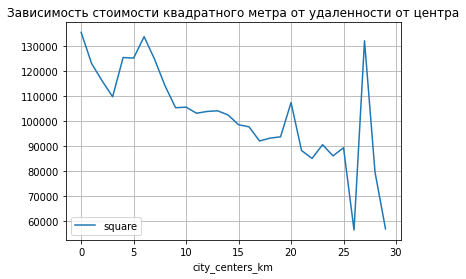

In [47]:
data2 = data.query('locality_name == "Санкт-Петербург" & city_centers_nearest >= 0').pivot_table(index='city_centers_km', values='square', aggfunc='median').plot(grid=True, title='Зависимость стоимости квадратного метра от удаленности от центра')
plt.show()

#filter_df.pivot_table(index='genre', values='name', aggfunc='count').\
#sort_values('name', ascending=False).head(30)




In [48]:
data.query('city_centers_km == 27 & last_price > 10000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square,weekday,month,year,type_floor,city_centers_km
670,5,"13,700,000.00",178.00,2017-08-08,4,2.77,16,125.00,4,False,False,False,16.00,1,Александровская,"13,012.00",27584,0.00,NaN,1.00,914.00,112.00,"76,966.29",1,8,2017,другой,27
748,13,"14,350,000.00",74.00,2017-11-28,2,3.13,5,30.00,3,False,False,False,25.00,0,Санкт-Петербург,"23,888.00",27313,1.00,"1,496.00",0.00,NaN,128.00,"193,918.92",1,11,2017,другой,27
2776,8,"10,500,000.00",105.00,2017-12-06,4,3.12,3,76.30,1,False,False,False,6.30,0,Пушкин,"14,880.00",27034,1.00,169.00,0.00,NaN,NaN,"100,000.00",2,12,2017,первый,27
2948,23,"11,350,000.00",75.00,2017-08-15,3,3.50,2,52.70,2,False,False,False,8.70,4,Пушкин,"15,337.00",27490,3.00,216.00,3.00,153.00,207.00,"151,333.33",1,8,2017,последний,27
8997,11,"13,000,000.00",100.00,2019-03-28,3,2.65,4,56.00,2,False,False,False,20.00,0,Пушкин,"15,550.00",27704,2.00,522.00,2.00,444.00,NaN,"130,000.00",3,3,2019,другой,27
12466,11,"15,000,000.00",89.60,2017-01-31,3,2.65,3,57.00,3,False,False,False,13.50,0,Пушкин,"15,065.00",27218,3.00,317.00,3.00,509.00,357.00,"167,410.71",1,1,2017,последний,27
12526,20,"16,500,000.00",151.00,2016-04-01,4,2.65,3,61.00,3,False,False,False,44.70,0,Пушкин,"15,580.00",27734,2.00,96.00,3.00,120.00,157.00,"109,271.52",4,4,2016,последний,27
15578,20,"16,000,000.00",101.90,2018-01-08,2,2.87,4,48.10,1,False,False,False,26.90,0,Пушкин,"15,201.00",27355,2.00,273.00,3.00,368.00,NaN,"157,016.68",0,1,2018,первый,27
18386,15,"24,800,000.00",190.00,2014-12-10,4,2.62,4,104.10,3,False,False,False,30.00,0,Пушкин,"15,072.00",27226,1.00,114.00,0.00,NaN,NaN,"130,526.32",2,12,2014,другой,27
22037,15,"10,900,000.00",145.00,2017-04-17,2,3.50,2,39.00,2,False,False,False,10.00,0,Пушкин,"15,337.00",27490,3.00,216.00,3.00,153.00,188.00,"75,172.41",0,4,2017,последний,27


**1. Изучим следующие параметры объектов:**


        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления

Чтоб строить графики с правильными размахами, смотреть минимальное и максимальное значение, среднее, медиану, будем выводить основную статистическую информацию снова с помощью метода describe.

- `total_area`:

In [49]:
data['total_area'].describe()  # посмотрим снова на основные статистические показатели столбца

count   23,321.00
mean        59.25
std         29.81
min         12.00
25%         40.00
50%         52.00
75%         69.20
max        297.50
Name: total_area, dtype: float64

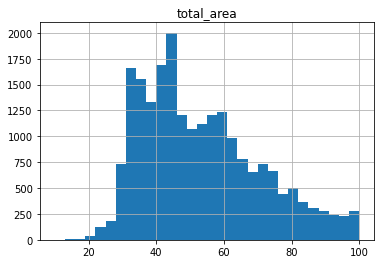

In [50]:
data.hist(column='total_area', range=(10,100), bins=30)
plt.show()

Самые распространенные квартиры на сайте имеют общую площадь 30-60 кв.м. График имеет ожидаемое распространение, помимо пика на значении 40 кв.м., есть пик есть пики поменьше на 30 кв.м. и 60 кв.м. Что характерно для разделения квартир на 1 -комнатные, 2-хкомнатныи и 3-комнатные. Самая минимальная общая площадь у квартиры 12 кв.м.

- `living_area`:

In [51]:
data['living_area'].describe()  # посмотрим снова на основные статистические показатели столбца

count   23,321.00
mean        33.80
std         19.19
min          6.50
25%         18.40
50%         30.30
75%         42.50
max        225.90
Name: living_area, dtype: float64

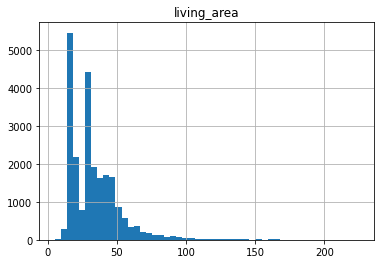

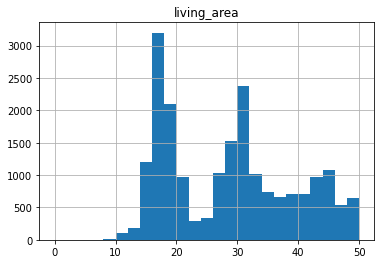

In [52]:
data.hist(column='living_area', range=(5,225), bins=50)
plt.show()
data.hist(column='living_area', range=(0,50), bins=25)
plt.show()

При построении гистограмм по параметру жилая площадь видно есть длинный хвост из квартир с жилой площадью более 100 кв.м., также есть 2 пика: примерно 18 кв.м. и 30 кв.м. Минимальная жилая площадь 6.50 кв.м. Такое распределение соответствует нашим ожиданиям. 

-  `kitchen_area`:

In [53]:
data['kitchen_area'].describe()  # посмотрим снова на основные статистические показатели столбца

count   23,321.00
mean        10.36
std          5.34
min          4.10
25%          7.30
50%          9.10
75%         11.40
max        107.00
Name: kitchen_area, dtype: float64

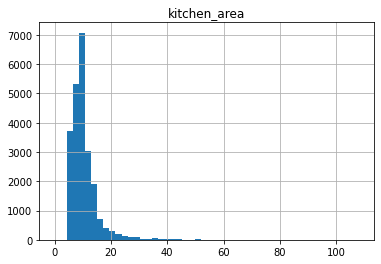

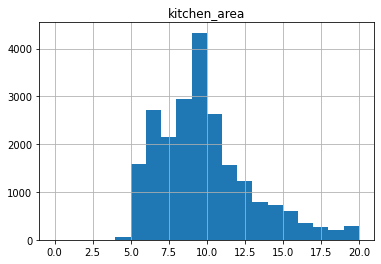

In [54]:
data.hist(column='kitchen_area', range=(0,108), bins=50)
plt.show()
data.hist(column='kitchen_area', range=(0,20), bins=20)
plt.show()

График распределения площади кухонь также оказался ожидаемым. Минимальная кухня имеет площадь 4.10 кв.м., максимальная 107.00 кв.м. Однако основная часть квартир имеет кухонную площадь 9 кв.м.

-  `last_price`:

In [55]:
data['last_price'].describe()  # посмотрим снова на основные статистические показатели столбца

count       23,321.00
mean     6,155,050.25
std      5,996,115.11
min        430,000.00
25%      3,425,000.00
50%      4,610,000.00
75%      6,740,000.00
max     99,000,000.00
Name: last_price, dtype: float64

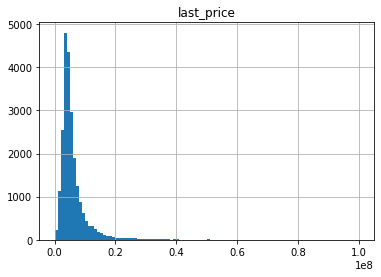

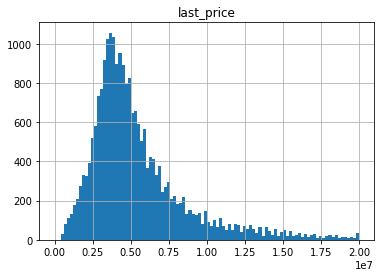

In [56]:
data.hist(column='last_price', range=(0,100000000), bins=100)
plt.show()
data.hist(column='last_price', range=(0,20000000), bins=100)
plt.show()


Гистограмма, отражающая цену объектов недвижимости имеет длинный хвост, это означает, что много квартир с высокими ценами.
Основная часть квартир в наших данных оценивается в районе от 2.5 млн до 7 млн. Самая дешевая квартира 430 тыс. Самая дорогая 99 млн.

-  `rooms`:

<AxesSubplot:>

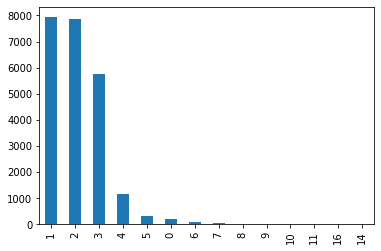

In [57]:
data['rooms'].value_counts().plot(kind='bar')  # построим столбчатую диаграмму для категориального признака тип этажа

Основная часть квартир имеет 1-2 комнаты. Однокомнатные популярней по ряду причин: цена(доступней для одиноких людей, а также людям в гражданском браке), рентабельность(покупка с целью продать дороже, а так же сдача в наём для приезжих, студентов и т.д), наследство.  Чуть меньше квартир с 3 комнатами. Максимальное число комнат - 16. Но мы их оставили, потому что в Санкт-Петербурге такие квартиры есть.


-  `ceiling_height`:

In [58]:
data['ceiling_height'].describe()  # посмотрим снова на основные статистические показатели столбца


count   23,321.00
mean         2.69
std          0.20
min          2.46
25%          2.60
50%          2.65
75%          2.70
max          4.19
Name: ceiling_height, dtype: float64

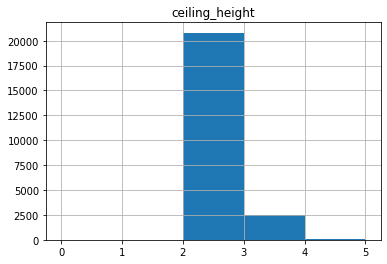

In [59]:
data.hist(column='ceiling_height', range=(0,5), bins=5)
plt.show()

После очистки датафрейма большая часть объявлений содержит потолки высотой 2.65 м.  Минимальная 2.46. Максимальная высота потолка 4.19.

-  `floor`:

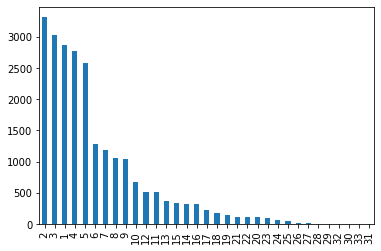

In [60]:
data['floor'].value_counts().plot(kind='bar')  # построим столбчатую диаграмму для категориального признака тип этажа
plt.show()

Большая часть квартир располагается с 1 по 5 этаж, причем квартир на 2 этаже больше всего. Далее группа квартир с 6 по 9 этаж. Очень мало квартир выше 26 этажа. Распределение соответствует ожиданиям.

-  `type_floor`:

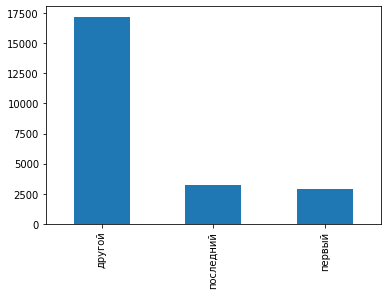

In [61]:
data['type_floor'].value_counts().plot(kind='bar')  # построим столбчатую диаграмму для категориального признака тип этажа
plt.show()

Распределение типов этажей в объявлениях выглядит нормально. Количество первых и последних этажей около 2500 в датафрейме,  промежуточных этажей примерно в 7 раз больше. Для квартир в многоквартирных домах это типично.

-  `floors_total`:

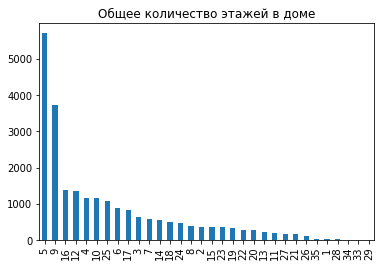

In [62]:
data['floors_total'].value_counts().plot(kind='bar',  title='Общее количество этажей в доме')  # построим столбчатую диаграмму для категориального признака день недели'].value_counts().plot(kind='bar', title='Распределение по дням недели')  # построим столбчатую диаграмму для категориального признака день недели
plt.show()

По гистограмме видно, что больше всего объявлений о продаже квартир в пяти- и девятиэтажных домах. 1-,28-, 34-, 33-, 29-этажные дома самые редкие.

-  `city_centers_nearest`:

In [63]:
data['city_centers_nearest'].describe()  # посмотрим снова на основные статистические показатели столбца

count   23,321.00
mean    10,672.48
std      9,914.07
min       -999.00
25%      2,211.00
50%     11,285.00
75%     15,254.00
max     65,968.00
Name: city_centers_nearest, dtype: float64

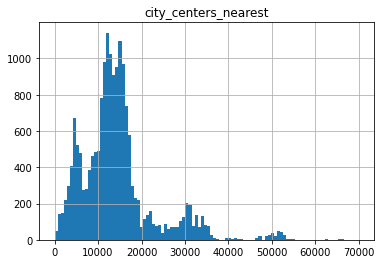

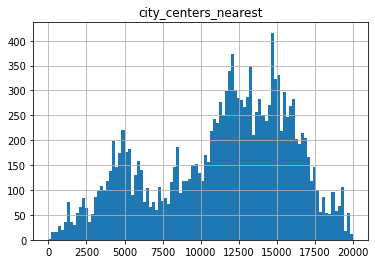

In [64]:
data.hist(column='city_centers_nearest', range=(0,70000), bins=100)
plt.show()
data.hist(column='city_centers_nearest', range=(0,20000), bins=100)
plt.show()

Гистограмма имеет ожидаемый размах. Длинный хвост, уходящий вправо, указывает на отдаленные населенные пункты. Большая часть квартир располагается в 10 - 17 км. от центра Петербурга. Также есть пик на расстоянии 5 км. от центра, но он поменьше.

-  `airports_nearest`:

In [65]:
data['airports_nearest'].describe()  # посмотрим снова на основные статистические показатели столбца

count   23,321.00
mean    21,818.24
std     16,801.84
min       -999.00
25%     10,138.00
50%     21,801.00
75%     34,445.00
max     84,869.00
Name: airports_nearest, dtype: float64

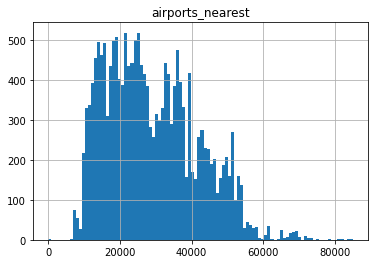

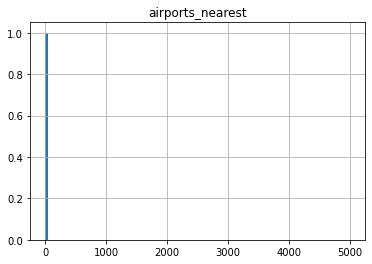

In [66]:
data.hist(column='airports_nearest', range=(0,85000), bins=100)
plt.show()
data.hist(column='airports_nearest', range=(0,5000), bins=100)
plt.show()

Большая часть квартир расположена от 10 до 60 км. от аэропорта. Но есть минимальное значение - 0 км. Отфильтруем датафрейм от таких квартир.

In [67]:
data = data.query('airports_nearest != 0')  # уберем квартиру, которая расположена в 0 км от аэропорта

-  `parks_nearest`:

In [68]:
data['parks_nearest'].describe()  # посмотрим на основные статистические показатели столбца

count   7,918.00
mean      491.08
std       342.61
min         1.00
25%       288.00
50%       455.00
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64

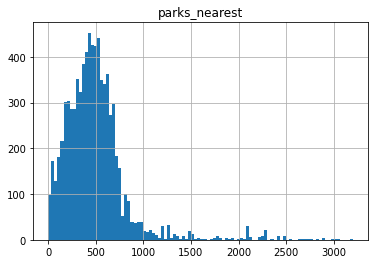

In [69]:
data.hist(column='parks_nearest', range=(0,3200), bins=100)
plt.show()

Многие квартиры имеют в шаговой доступности парки (до 1 км). 

-  `weekday`:

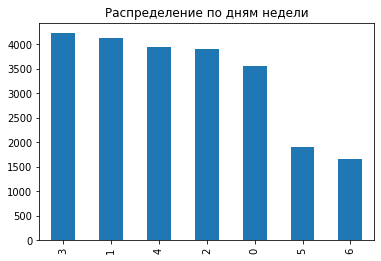

In [70]:
data['weekday'].value_counts().plot(kind='bar', title='Распределение по дням недели')  # построим столбчатую диаграмму для категориального признака день недели
plt.show()

Больше всего объявлений размещают в четверг и вторник. Меньше всего по выходным.

-  `month`:

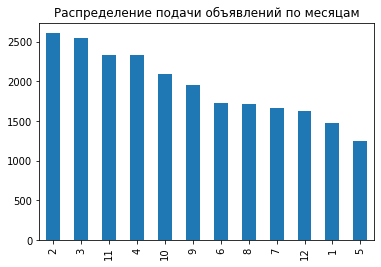

In [71]:
data['month'].value_counts().plot(kind='bar', title='Распределение подачи объявлений по месяцам')  # построим столбчатую диаграмму для категориального признака месяц размещения объявления
plt.show()

Больше всего объявлений разместили в феврале и марте, чуть меньше в ноябре и апреле. Меньше всего объявлений размещено в мае. Праздничные месяцы отличаются меньшим предложением.

**2. Изучим, как быстро продавались квартиры.**

Столбец `days_exposition` показывает сколько дней было размещено объявление.
Для анализа данных построим гистограмму, посчитаем медиану и среднее.

In [72]:
display(round(data['days_exposition'].median()))  # медианное время продажи
display(round(data['days_exposition'].mean()))  # среднее время продажи                                                  
abnormal_values('days_exposition')  # вызовем собственную функцию, посмотрим по ней Q3 плюс 1,5 std. За границами правого уса будут долгие продажи


95

180

[-232.5, 507.5]

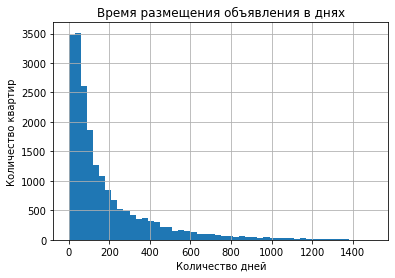

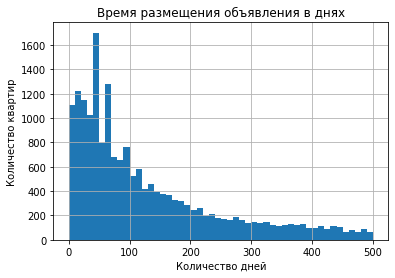

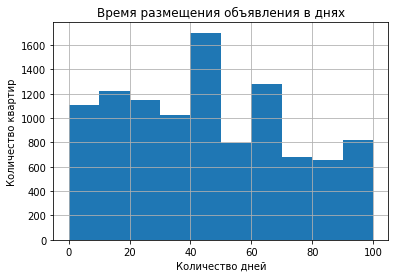

In [73]:
data.hist(column='days_exposition', range=(0,1500), bins=50)  # построим гистограмму для столбца days_exposition
plt.title('Время размещения объявления в днях')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()
data.hist(column='days_exposition', range=(0,500), bins=50)  # построим гистограмму для времени продажи до 500 дней, чтоб лучше увидеть распределение
plt.title('Время размещения объявления в днях')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()
data.hist(column='days_exposition', range=(0,100), bins=10)  # сделаем гистограмму со значением до 150 дней, чтоб посмотреть пики
plt.title('Время размещения объявления в днях')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

Таким образом, мы видим, что медианное время продажи квартиры 95 дней, а среднее по столбцу 180 дней. Есть много выбивающихся значений. По правому 'усу' видно, что долгими можно считать продажи от 508 дней.

Что касается гистограмм, то видно, что обычно квартиры снимают с продажи в срок 45-60 дней, есть еще небольшой пик в 90 дней. Возможно, это связано с правилами размещения объявлений, может быть после этого срока их надо продлевать вручную, либо оплачивать, поэтому объявления автоматом закрываются на сайте.

**3. Какие факторы больше всего влияют на общую стоимость объекта?**

После предобработки данных изучим более подробно общую площадь, жилую площадь, площадь кухни, цену объекта, количество комнат, высоту потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.

Для того, чтобы  понимать, как разные значения зависят друг от друга построим для количественных признаков диаграммы рассеянияния. 

Для того, чтобы посмотреть корреляцию всеми переменными, с том числе и категориальными, сформируем матрицу корреляций.



**`total_area`**


Зависимость цены и общей площади

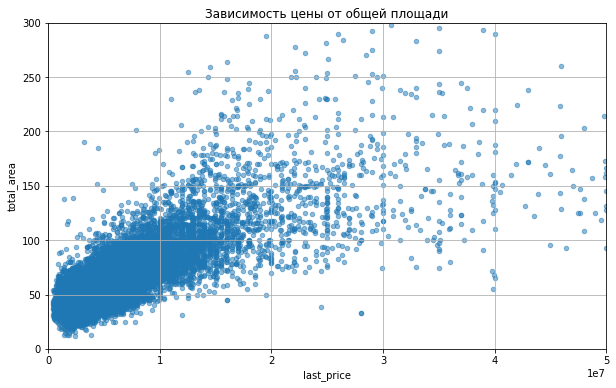

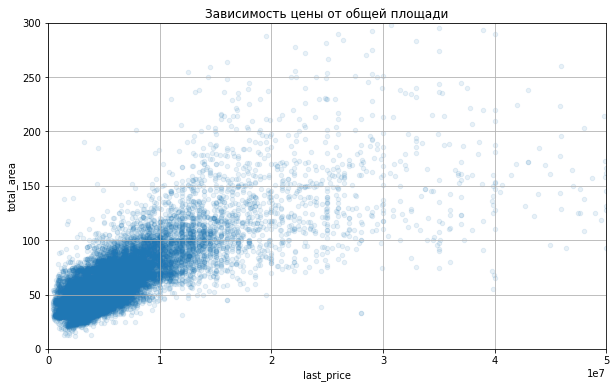

In [74]:
data.plot(x='last_price',
          y='total_area',
          kind='scatter',
          title='Зависимость цены от общей площади',
          ylim=(0,300),
          xlim=(0,50000000),
          alpha=0.5,
          grid=True,
          figsize=(10,6))  #  построим диаграмму рассеяния с хорошо окрашенными точками
plt.show()
data.plot(x='last_price',
          y='total_area',
          kind='scatter',
          title='Зависимость цены от общей площади',
          ylim=(0,300),
          xlim=(0,50000000),
          alpha=0.1,
          grid=True,
          figsize=(10,6))  #  построим диаграмму рассеяния с большей прозрачностью, чтоб увидеть тренд
plt.show()

Зависимость цены и жилой площади

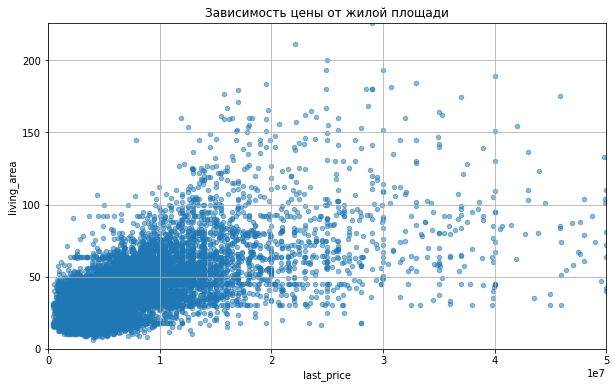

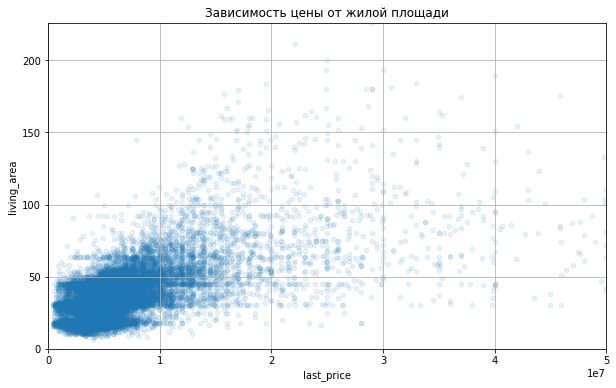

In [75]:
data.plot(x='last_price',
          y='living_area',
          kind='scatter',
          title='Зависимость цены от жилой площади',
          ylim=(0,226),
          xlim=(0,50000000),
          alpha=0.5,
          grid=True,
          figsize=(10,6))
plt.show()
data.plot(x='last_price',
          y='living_area',
          kind='scatter',
          title='Зависимость цены от жилой площади',
          ylim=(0,226),
          xlim=(0,50000000),
          alpha=0.1,
          grid=True,
          figsize=(10,6))
plt.show()

Зависимость цены и площади кухни

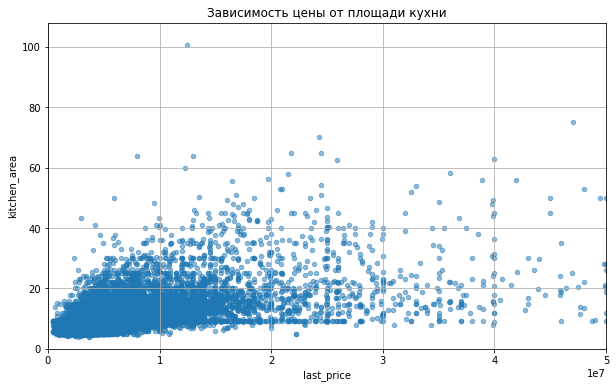

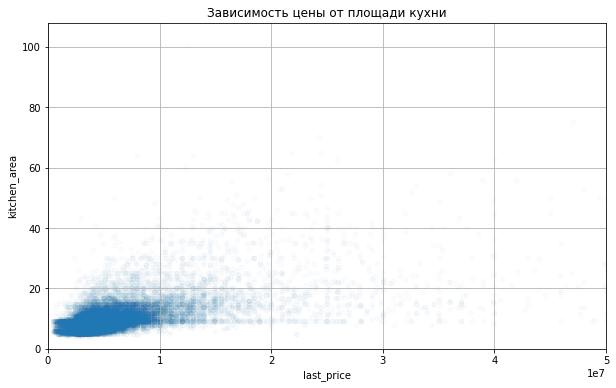

In [76]:
data.plot(x='last_price',
          y='kitchen_area',
          kind='scatter',
          title='Зависимость цены от площади кухни',
          ylim=(0,108),
          xlim=(0,50000000),
          alpha=0.5,
          grid=True,
          figsize=(10,6))
plt.show()
data.plot(x='last_price',
          y='kitchen_area',
          kind='scatter',
          title='Зависимость цены от площади кухни',
          ylim=(0,108),
          xlim=(0,50000000),
          alpha=0.02,
          grid=True,
          figsize=(10,6))
plt.show()

Зависимость цены от количества комнат:

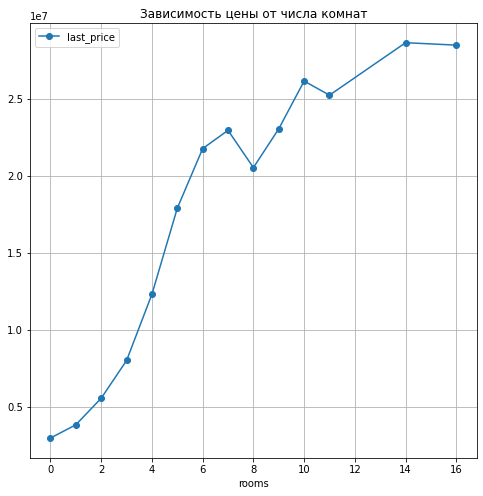

In [77]:
(data.pivot_table(index='rooms', values='last_price')  # используем свобную таблицу для построения графика
    .plot(grid=True, style='o-',title='Зависимость цены от числа комнат', figsize=(8, 8)))
plt.show()

По графику видно, что существует связь между числом комнат и ценой объекта. Однако более сильная связь в квартирах до 6 комнат, потом график меняет наклон, если комнат больше 6, то связь с ценой немного слабее. Возможно комнат много, но они небольшие по площади.

Зависимсть цены от типа этажа (первый, последний или другой):

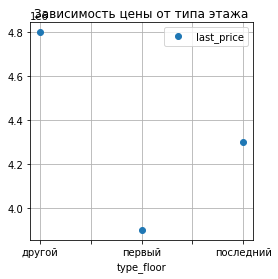

In [78]:
(data.pivot_table(index='type_floor', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', title='Зависимость цены от типа этажа', figsize=(4, 4)))
plt.show()

Можно говорить о том, что квартиры на первом этаже стоят дешевле, квартиры на последнем этаже немного дороже. Однако обе эти категории уступают по стоимость объектам недвижимости не на первом/последнем этажах. 

Обратимся еще к матрице корреляций.

In [79]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'weekday', 'month', 'year']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,weekday,month,year
last_price,1.00,0.75,0.63,0.55,0.46,-0.01,0.01,-0.05
total_area,0.75,1.00,0.92,0.55,0.79,-0.01,0.01,-0.09
living_area,0.63,0.92,1.00,0.35,0.87,-0.01,-0.00,-0.07
kitchen_area,0.55,0.55,0.35,1.00,0.22,-0.01,0.01,-0.06
rooms,0.46,0.79,0.87,0.22,1.00,-0.01,-0.00,-0.05
weekday,-0.01,-0.01,-0.01,-0.01,-0.01,1.00,0.01,-0.00
month,0.01,0.01,-0.00,0.01,-0.00,0.01,1.00,-0.27
year,-0.05,-0.09,-0.07,-0.06,-0.05,-0.00,-0.27,1.00


Визуализировав диаграммы рассеяния и проанализировав матрицу корреляций, мы видим, что самая сильная связь существует между ценой и общей площадью квартиры (корреляция 0.75), между ценой и жилой площадью также обнаружена связь,но немного слабее (корреляция 0.63) ,  между ценой и площадью кухни связь тоже есть, но не слишком сильная (кореляция 0.55). Количество комнат и цена связаны еще немного меньше (корреляция 0.46). Это все положительные связи, то есть при росте одной переменной увеличивается и другая. 
​
Не обнаружены взяимосвязь между ценой и датой размещения объявления.
​

**4. Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений.**

In [80]:
top_city = data['locality_name'].value_counts().head(10)  # создадим переменную с топ-10 городов по количеству объявлений 
display(top_city)  # выведем top_city на экран
  # сделаем срез из нас.пунктов из топ-10 городов по количеству объявления. 
  # Сгруппируем их по названию, посчитаем среднюю стоимость кв.метра, по умолчанию пивот счиает среднее арифметическое, это нам и нужно
top_city_square = data.query('locality_name in (@top_city.index)').pivot_table(index='locality_name',values='square').sort_values('square', ascending=False)
top_city_square


Санкт-Петербург    15472
Мурино               581
Кудрово              469
Шушары               438
Всеволожск           396
Пушкин               362
Колпино              336
Парголово            326
Гатчина              307
Выборг               233
Name: locality_name, dtype: int64

,square
locality_name,
Санкт-Петербург,"113,441.47"
Пушкин,"103,039.18"
Кудрово,"95,261.96"
Парголово,"90,205.42"
Мурино,"85,917.83"
Шушары,"78,513.33"
Колпино,"75,352.48"
Гатчина,"68,746.15"
Всеволожск,"68,670.46"


**5. Выделим квартиры из Санкт-петербурга и посчитаем среднюю цену каждого километра.**

Для этого сделаем срез из квартир Санкт-Петербурга с расстоянием от ценрта равным или больше 0, чтобы в срез не попали дефолтные значения, ведь пропуски в этом столбце в предобработке мы заполнили значением -999.

,last_price
locality_name,
Санкт-Петербург,"7,493,441.09"


,city_centers_nearest
locality_name,
Санкт-Петербург,"11,630.37"


locality_name
Санкт-Петербург   644.30
dtype: float64

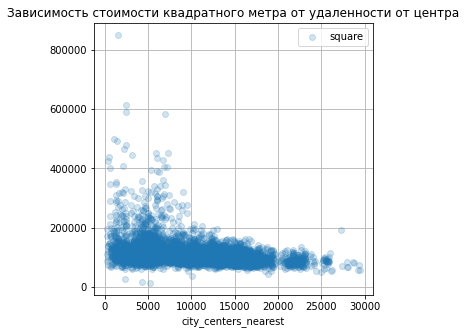

In [81]:
# сделаем срез из квартир Санкт-Петербурга посчитаем среднее по стоимости квартир
spb_mean_price = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='locality_name',values='last_price').sort_values('last_price', ascending=False) 
display(spb_mean_price)  # выведем на экран среднее расстояние от центра
# сделаем срез из квартир Санкт-Петербурга и с расстоянием до центра > 0 и посчитаем среднее по удаленности от центра
spb_mean_km = data.query('locality_name == "Санкт-Петербург" & city_centers_nearest >= 0').pivot_table(index='locality_name',values='city_centers_nearest').sort_values('city_centers_nearest', ascending=False)
display(spb_mean_km)  # выведем среднею удаленность на экран
display(spb_mean_price['last_price'] / spb_mean_km['city_centers_nearest'])  # средняя стоимость каждого километра

#  сделаем срез с городом Санкт-Петербург и посмотрим на зависимость стоимости квадратного метра от удаленности от центра
data2 = data.query('locality_name == "Санкт-Петербург" & city_centers_nearest >= 0').pivot_table(index='city_centers_nearest', values='square').plot(grid=True, style='o',title='Зависимость стоимости квадратного метра от удаленности от центра', alpha=0.2, figsize=(5, 5))
plt.show()

In [ ]:
data.query('locality_name == "Санкт-Петербург" & city_centers_km < 10 & city_centers_km >= 0')[['last_price', 'city_centers_km']].corr()

,last_price,city_centers_km
last_price,1.00,-0.22
city_centers_km,-0.22,1.00


Средняя стоимость каждого километра 644.26.

По диаграмме рассеяния мы видим, что квадратный метр жилья дороже в пределах 10 км от центра. Чем ближе к центру, тем стоимость жилья дороже.
Есть слабая отрицательная корреляция (-0,22) в пределах всего Петербурга между ценой квадратного метра и расстоянием от центра. То есть если увеличивается расстояние от центра, то стоимость уменьшается, и наоборот. Но связь очень слабая, возможно лучше будет посчитать ее относительно центра города и окраин. 

**Вывод:**

Проведя исследовательский анализ, мы изучили основные параметры квартир, представленных в датафрейме. Описали самые распространенные варианты квартир. Также была изучена взаимосвязь между ценой и общей, жилой площадями, площадью кухни, количеством комнат, этажа, на котором расположена квартира, а также датой размещения. 
Сильная положительная связь с ценой оказалась у общей площади. Чем больше один параметр, тем выше и другой. Также связаны цена и жилая площадь. Совсем нет связи между ценой и днем размещения объявления, также нет связи с месяцем размещения объявления. 

Type Markdown and LaTeX:  𝛼2

### Общий вывод

В ходе исследования мы проанализировали параметры, определяющие рыночную стоимость объектов недвижимости Санкт-Петербурга и Ленинградской области. Результаты помогут автоматизировать систему расчета рыночной стоимости недвижимости.

Были описаны самые распространенные и широко представленные варианты объектов недвижимости. Сильные отклонения в минимальную или максимальную сторону от средних параметров могут говорить о мошеннических действиях или аномалиях и могут требовать дополнительной проверки со стороны работников сайта.

1. Средняя стоимость квадратного метра в Санкт-Петербурге 113,241.59 руб., в Пушкине 103,039.18 руб., в Сестрорецке  101,757.62.

2. Квартиры чаще имеют общую площадь 30-60 кв.м., 1-2 комнаты в 5 или 9-этажном доме.

3. Значительная часть объявлений публикуется  в диапозоне от 45 до 231 дня. 

4. Отдаленность от центра в среднем 11 км, от аэропорта около 25 км. 

5. В шаговой доступности многих квартир (500 - 1000 м.) есть парк.

Выявлены параметры, сильнее всего влияющие на рыночную стоимость:

1. Место расположения. Большое влияние на стоимость жилья оказывает населенный пункт, в котором недвижимость расположена. Квартиры в Санкт-Петербурге и примыкающих городах оцениваются дороже, нежели объекты Ленинградской области.

2. Общая площадь квартиры. Чем просторнее квартира, тем дороже она оценивается.

3. Жилая площадь, она в свою очередь взаимосвязана с обшей площадью и также влияет на оценку стоимости.

4. Площадь кухни также влияет на стоимость жилья.

5. Расстояние до центра. Обнаружена отрицательная связь, чем больше расстояние от центра, тем дешевле квартира, и наоборот.

6. Количество комнат коррелирует не так сильно с рыночной стоимостью, но все же стоит включить этот параметр в оценку стоимости жилья.

7. Квартиры на первом и последнем этажах несколько уступают в стоимости.

Данных было предоставлено достаточно для анализа, однако в столбце `locality_name` были пропуски, неявные дубликаты. Можно сделать столбец обязательным для подачи объявления и убрать возможность ручного ввода (лучше выбирать населенный пункт из предложенного списка, если это возможно).
Также было много ошибок при заполнении высоты потолка. Стоит ограничить диапозон возможных величин для ввода параметра.